Let $f(x_1, \dots, x_n) = f(x)$ be a real-valued function of $N$-variables. Denote the first partial derivatives by
\begin{equation}
    g_i = \frac{\partial f}{\partial x_i}, \quad i = 1, \dots, N.
\end{equation}
Most of our minimisation methods are iterative and each iteration reduces the value of $f(x)$ by searching along a descent direction in the space of the variables in the following way.

The iteration begins with a starting point $x_0$, and at this point the gradient vector $g$ is calculated. Then a search direction $s$ is chosen, that satisfies the condition $g \cdot s < 0$. It follows that if we move from $x_0$ in the direction of $s$, then the value of $f(x)$ becomes smaller initially. In other words the function of one variable
\begin{equation}
    \phi(\lambda) = f(x_0 + \lambda s)
\end{equation}
satisfies the condition $\phi'(0) < 0$ which is equivalent to $g \cdot s < 0$. The next stage is to consider the function $\phi(\lambda)$, and choose a value of $\lambda^*$ that satisfies the inequality
\begin{equation}
    f (x_0 + \lambda^* s) < f(x_0).
\end{equation}
Usually $\lambda^*$ will be chosen to minimise $\phi(\lambda)$. The vector $x_0$ is replaced by $x_1 = x_0 + \lambda^* s$ and another iteration is begun.

Consider the 'bedpan function'
\begin{equation}
    x + y + \frac{x^2}{4} - y^2 + \left(y^2 - \frac{x}{2}\right)^2,
\end{equation}
the 'Rosenbrock-like function'
\begin{equation}
    (1-x^2) + 80(y-x^2)^2,
\end{equation}
and the following quadratic function of three variables
\begin{equation}
    0.4x^2 + 0.2y^2 + z^2 + xz.
\end{equation}

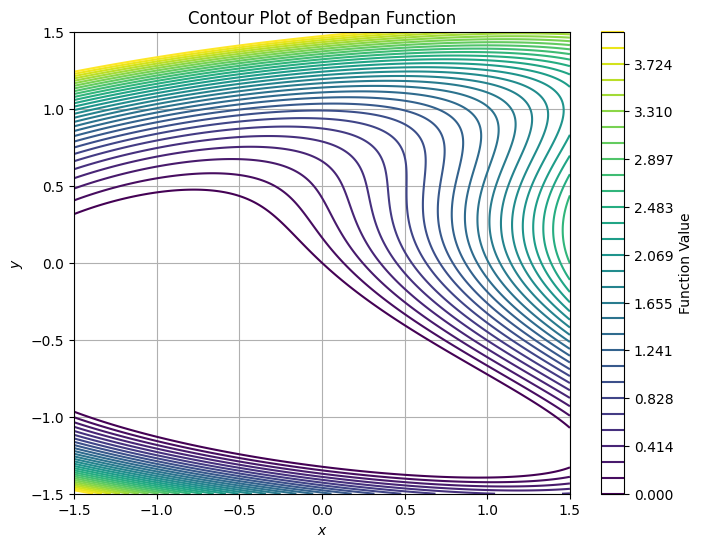

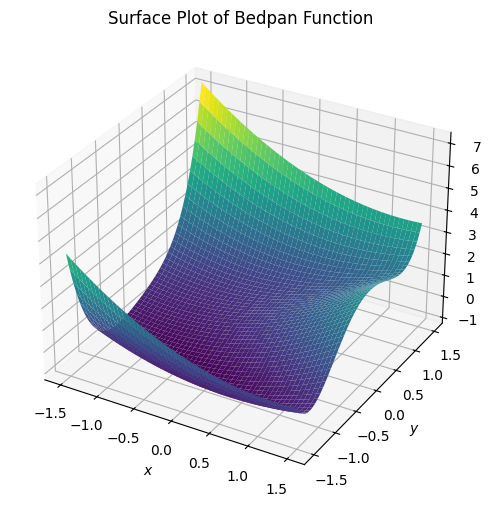

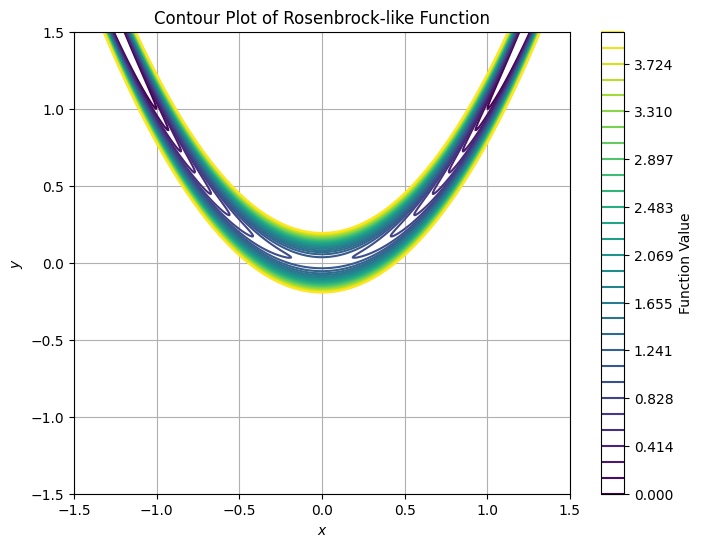

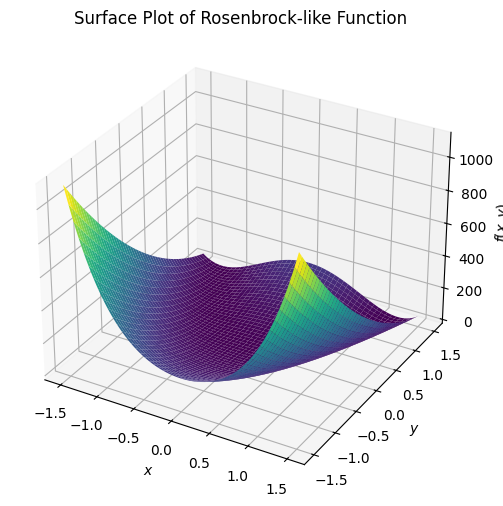

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def bedpan_function(x, y):
    return x + y + x**2/4 - y**2 + (y**2 - x/2)**2

def rosenbrock_like_function(x, y):
    return (1-x**2) + 80*(y - x**2)**2

def quadratic_three_function(x, y, z):
    return 0.4*x**2 + 0.2*y**2 + z**2 + x*z

def create_plots(func, title):
    '''
    Generates contour and surface plots for a given function.
    '''
    # Define the axis intervals
    x = np.linspace(-1.5, 1.5, 400)
    y = np.linspace(-1.5, 1.5, 400)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    # Create the Contour Plot
    plt.figure(figsize=(8, 6))
    contour = plt.contour(X, Y, Z, levels=np.linspace(0, 4, 30), cmap='viridis')
    plt.colorbar(contour, label='Function Value')
    plt.title(f'Contour Plot of {title}')
    plt.xlabel(f'$x$')
    plt.ylabel(f'$y$')
    plt.grid(True)
    plt.show()

    # Create the 3D Surface Plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title(f'Surface Plot of {title}')
    ax.set_xlabel(f'$x$')
    ax.set_ylabel(f'$y$')
    ax.set_zlabel(f'$f(x, y)$')
    plt.show()

create_plots(bedpan_function, "Bedpan Function")
create_plots(rosenbrock_like_function, "Rosenbrock-like Function")

To find the minima of a function of two variables, we must first find the stationary points by setting the partial derivatives with respect to x and y equal to zero. Then, we use the second derivative test to classify these points.

1.  Bedpan Function. The partial derivatives are
\begin{align}
    \frac{\partial f}{\partial x} &= 1 + x/2 - 2(y^2 - x/2)(1/2) = 1 + x/2 - (y^2 - x/2) = 1 + x - y^2 \\
    \frac{\partial f}{\partial y} &= 1 - 2y + 2(y^2 - x/2)(2y) = 1 - 2y + 4y^3 - 2xy
\end{align}
Set the partial derivatives to zero to find stationary points,
\begin{align}
    &1 + x - y^2 = 0 \implies x = y^2 - 1, \\
    &1 - 2y + 4y^3 - 2xy = 0.
\end{align}
Substitute the expression for $x$ from the first equation into the second to get
\begin{equation}
    y = -\frac{1}{2^{1/3}} \approx -0.7937
\end{equation}
Now, to find the corresponding $x$ value,
\begin{equation}
    x = y^2 - 1 = \frac{1}{2^{2/3}} - 1 \approx 0.63 - 1 \approx -0.37.
\end{equation}
So, the only stationary point is approximately at $(-0.37, -0.7937)$. To find the minimum value, we substitute the exact values of $x$ and $y$ back into $f(x, y)$,
\begin{equation}
    f(-0.37, -0.7937) \approx -1.095.
\end{equation}


2.  Rosenbrock-like Function. The partial derivatives are
\begin{align}
    \frac{\partial f}{\partial x} &= -2(1 - x) - 160(y - x^2)(2x) = -2 + 2x - 320xy + 320x^3, \\
    \frac{\partial f}{\partial y} &= 160(y - x^2) = 160(y - x^2).
\end{align}
Set the partial derivatives to zero,
\begin{align}
    &160(y - x^2) = 0  \implies y = x^2, \\
    &-2 + 2x - 320xy + 320x^3 = 0,
\end{align}
which implies $x = 1$, hence $y = 1$ so the only stationary point is at $(1, 1)$. This means that the minimum value of the Rosenbrock-like function is 0.